In [ ]:
# import all the libraries 
import nltk
nltk.download('punkt')
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Next we will mount our google drive on the colab 
run the code below and follow the instructions the G drive will be mounted on drive -> MyDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Readind the files as a pandas dataframe 

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/input_file.txt",delimiter="\t")
dataset

,"Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video."


converting the data frame to text

In [ ]:
text= dataset.to_string()
text

"Empty DataFrame\nColumns: [Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video.]\nIndex: []"

Breaking the text into sentences 

In [ ]:
tokenized_text = sent_tokenize(text)
print(tokenized_text)

["Empty DataFrame\nColumns: [Text Analytics has lots of applications in today's online world.", 'By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event.', 'Amazon can understand user feedback or review on the specific product.', "BookMyShow can discover people's opinion about the movie.", 'Youtube can also analyze and understand peoples viewpoints on a video.]', 'Index: []']


Breaking the text into words 

In [ ]:
tokenized_word=word_tokenize(text)
print(tokenized_word)
print(len(tokenized_word))

['Empty', 'DataFrame', 'Columns', ':', '[', 'Text', 'Analytics', 'has', 'lots', 'of', 'applications', 'in', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweets', 'on', 'Twitter', ',', 'we', 'can', 'find', 'trending', 'news', 'and', 'peoples', 'reaction', 'on', 'a', 'particular', 'event', '.', 'Amazon', 'can', 'understand', 'user', 'feedback', 'or', 'review', 'on', 'the', 'specific', 'product', '.', 'BookMyShow', 'can', 'discover', 'people', "'s", 'opinion', 'about', 'the', 'movie', '.', 'Youtube', 'can', 'also', 'analyze', 'and', 'understand', 'peoples', 'viewpoints', 'on', 'a', 'video', '.', ']', 'Index', ':', '[', ']']
75


finding the frequencies distribution

In [ ]:
fdist = FreqDist(tokenized_word)
print(fdist)


<FreqDist with 56 samples and 75 outcomes>


Finding the two most common words  

In [ ]:
fdist.most_common(2)

[('.', 5), ('on', 4)]

Plot of the frequencies distribution

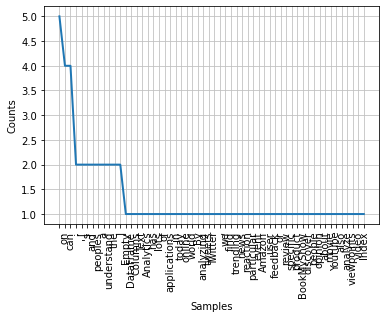

In [ ]:
v=fdist.plot(75,cumulative=False)
plt.show()

#Analysis 01 
## Removal of StopWords

In [ ]:
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

 
 
stop_words = set(stopwords.words('english'))
 
word_tokens = tokenized_word
 
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print(word_tokens)
print(len(word_tokens))
print(filtered_sentence)
print(len(filtered_sentence))

['Empty', 'DataFrame', 'Columns', ':', '[', 'Text', 'Analytics', 'has', 'lots', 'of', 'applications', 'in', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweets', 'on', 'Twitter', ',', 'we', 'can', 'find', 'trending', 'news', 'and', 'peoples', 'reaction', 'on', 'a', 'particular', 'event', '.', 'Amazon', 'can', 'understand', 'user', 'feedback', 'or', 'review', 'on', 'the', 'specific', 'product', '.', 'BookMyShow', 'can', 'discover', 'people', "'s", 'opinion', 'about', 'the', 'movie', '.', 'Youtube', 'can', 'also', 'analyze', 'and', 'understand', 'peoples', 'viewpoints', 'on', 'a', 'video', '.', ']', 'Index', ':', '[', ']']
75
['Empty', 'DataFrame', 'Columns', ':', '[', 'Text', 'Analytics', 'lots', 'applications', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweets', 'Twitter', ',', 'find', 'trending', 'news', 'peoples', 'reaction', 'particular', 'event', '.', 'Amazon', 'understand', 'user', 'feedback', 'review', 'specific', 'product', '.', 'BookMyShow', 'disco

20+ words have been categorized as stop words and have been removed from the text.

#Analysis 2
## POS Tagging and distribution of tagged words histogram

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

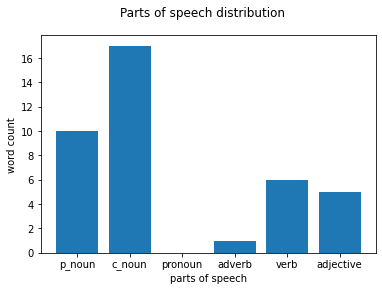

In [ ]:
# ANALYSIS 2: Distribution of Parts-of-speech
from nltk import pos_tag
import string
# finding all pos from the text using nltk
pos_tags = nltk.pos_tag(filtered_sentence) 

# Extracting proper noun,common noun, pronuon, adverb, verb and adjective
prop_nn, comm_nn, pr_nn, advrb, vrb, adj = [], [], [], [], [], []
for tag in pos_tags:
    wrd, tg = tag

    # iterating over the word to find any punctuation and skipping those words
    if any([(True if alpt in string.punctuation else False) for alpt in wrd]):
        continue
    
    # classifying different parts of speech
    if 'NNP' in tg:
        prop_nn.append(wrd)
    elif ('NNP' not in tg) and ('NN' in tg):
        comm_nn.append(wrd)
    elif 'PR' in tg:
        pr_nn.append(wrd)
    elif 'RB' in tg:
        advrb.append(wrd)
    elif 'VB' in tg:
        vrb.append(wrd)
    elif 'JJ' in tg:
        adj.append(wrd)

# Extracting unique words for each POS
prop_nn = list(set(prop_nn))
comm_nn = list(set(comm_nn))
pr_nn = list(set(pr_nn))
advrb = list(set(advrb))
vrb = list(set(vrb))
adj = list(set(adj))

# plotting the POS distribution
plt.bar(['p_noun', 'c_noun', 'pronoun', 'adverb', 'verb',
          'adjective'], [len(prop_nn), len(comm_nn), len(pr_nn), len(advrb),
          len(vrb), len(adj)])
plt.xlabel('parts of speech')
plt.ylabel('word count')
plt.suptitle('Parts of speech distribution')
plt.show()

In [ ]:
pos_tags

[('Empty', 'NNP'),
 ('DataFrame', 'NNP'),
 ('Columns', 'NNP'),
 (':', ':'),
 ('[', 'JJ'),
 ('Text', 'NNP'),
 ('Analytics', 'NNP'),
 ('lots', 'NNS'),
 ('applications', 'NNS'),
 ('today', 'NN'),
 ("'s", 'POS'),
 ('online', 'JJ'),
 ('world', 'NN'),
 ('.', '.'),
 ('By', 'IN'),
 ('analyzing', 'VBG'),
 ('tweets', 'NNS'),
 ('Twitter', 'NNP'),
 (',', ','),
 ('find', 'VBP'),
 ('trending', 'VBG'),
 ('news', 'NN'),
 ('peoples', 'NNS'),
 ('reaction', 'VBP'),
 ('particular', 'JJ'),
 ('event', 'NN'),
 ('.', '.'),
 ('Amazon', 'NNP'),
 ('understand', 'VBP'),
 ('user', 'NNP'),
 ('feedback', 'NN'),
 ('review', 'NN'),
 ('specific', 'JJ'),
 ('product', 'NN'),
 ('.', '.'),
 ('BookMyShow', 'NNP'),
 ('discover', 'JJ'),
 ('people', 'NNS'),
 ("'s", 'POS'),
 ('opinion', 'NN'),
 ('movie', 'NN'),
 ('.', '.'),
 ('Youtube', 'NNP'),
 ('also', 'RB'),
 ('analyze', 'VBP'),
 ('understand', 'JJ'),
 ('peoples', 'NNS'),
 ('viewpoints', 'NNS'),
 ('video', 'NN'),
 ('.', '.'),
 (']', 'JJ'),
 ('Index', 'NN'),
 (':', ':'),
 ('[

common_noun have occured the most of the time as indicated by the histogram

#Analysis 3 
## Using Named entity recognition

In [62]:
# import spacy
import spacy
 
# load spacy model
nlp = spacy.load('en_core_web_sm')
 
# load data
sentence = text
doc = nlp(sentence)
 
# print entities
for ent in doc.ents:
    print(ent.text,  ent.label_)

Text Analytics ORG
today DATE
Twitter PERSON
Amazon ORG


Named entity recognition of our sentences is given above. All the organizations, places and time are tagged accordingly. 
